# Codigo base

In [2]:
source("utils.r")

# Cargar datos

In [3]:
# Example of how to call the function
url <- "https://github.com/mbarrena/tesis/raw/refs/heads/main/data/Data%20trimestral%201950%20a%202023%20con%20DUMMIES%20outliers%20(por%20trimestre).xlsx"
temp_file <- tempfile(fileext = ".xlsx")
GET(url, write_disk(temp_file, overwrite = TRUE))

# Read the `data` from the Excel file
df_trimestral_crudo <- read_excel(temp_file)

Response [https://raw.githubusercontent.com/mbarrena/tesis/refs/heads/main/data/Data%20trimestral%201950%20a%202023%20con%20DUMMIES%20outliers%20(por%20trimestre).xlsx]
  Date: 2025-03-23 23:46
  Status: 200
  Content-Type: application/octet-stream
  Size: 57.9 kB
<ON DISK>  /var/folders/59/6k0yx0n916gg1mdb04zs42rm0000gn/T//RtmpVQ9q6E/fileaaca4a2d44eb.xlsxNULL

In [5]:
# Select specific columns and rows from df_trimestral_crudo
df_Arg <- df_trimestral_crudo |> 
  dplyr::slice(37:dplyr::n()) |>  # Equivalent to iloc[36:] (1-based index in R)
  dplyr::select(año, trimestre, ipc_ajust, E, Ebc, pbird, impp_usa, Psoja_USA, Pmaíz_USA, Ptrigo_USA, TOTfmi) |>  # nolint
  as.data.frame()  # Convert to data frame (if needed)

# Rename "ipc_ajust" to "ipc"
df_Arg <- renameColumnOfDataframe(df_Arg, "ipc_ajust", "ipc")

# Display first 6 rows
print(head(df_Arg))

# Display first 65 rows
print(head(df_Arg, 65))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi
1  2.046667 1.0433333   1.736667     NA
2  2.106667 1.1500000   1.743333     NA
3  1.976667 1.1166667   1.723333     NA
4  1.970000 0.9856667   1.780000     NA
5  1.996667 1.0096667   1.800000     NA
6  1.996667 1.0766667   1.786667     NA
    año trimestre          ipc            E          Ebc  pbird impp_usa
1  1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2  1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.251

In [6]:
# Copy df_Arg to df_ERPT_Arg1
df_ERPT_Arg1 <- df_Arg

# Display first rows
print(head(df_ERPT_Arg1))

# Apply logarithm to specific columns
df_ERPT_Arg1 <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg1) # nolint: line_length_linter.

# Display transformed dataframe
print(head(df_ERPT_Arg1))
print(tail(df_ERPT_Arg1))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi
1  2.046667 1.0433333   1.736667     NA
2  2.106667 1.1500000   1.743333     NA
3  1.976667 1.1166667   1.723333     NA
4  1.970000 0.9856667   1.780000     NA
5  1.996667 1.0096667   1.800000     NA
6  1.996667 1.0766667   1.786667     NA


   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.51272 12.11605 2.584099 0.7451069
3 1959      3ºTr -24.07248 -25.50180 -25.50108 12.02130 2.586217 0.6814119
4 1959      4ºTr -24.01901 -25.51316 -25.51770 12.09045 2.600923 0.6780335
5 1960      1ºTr -23.95846 -25.51557 -25.51509 12.13520 2.603007 0.6914791
6 1960      2ºTr -23.95506 -25.51477 -25.51320 12.14175 2.604047 0.6914791
     Pmaíz_USA Ptrigo_USA TOTfmi
1  0.042420716  0.5519676     NA
2  0.139761942  0.5557990     NA
3  0.110348057  0.5442604     NA
4 -0.014437048  0.5766134     NA
5  0.009620243  0.5877867     NA
6  0.073869849  0.5803517     NA
     año trimestre       ipc        E      Ebc    pbird impp_usa Psoja_USA
255 2022      3ºTr  9.225483 4.910408 4.935085 13.50334 4.737288  2.708050
256 2022      4ºTr  9.397475 5.090292 5.118549 13.48080 4.718452  2.636674
257 2023      1ºTr 

In [7]:
# Create df_ERPT_Arg as a copy of df_Arg
df_ERPT_Arg <- df_Arg

# Display first rows
print(head(df_ERPT_Arg))

# Apply logarithm transformation
df_ERPT_Arg <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display transformed dataframe
print(head(df_ERPT_Arg))

# Apply differencing transformation
df_ERPT_Arg <- makeDiffColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display first and last rows
print(head(df_ERPT_Arg))
print(tail(df_ERPT_Arg, 90))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi
1  2.046667 1.0433333   1.736667     NA
2  2.106667 1.1500000   1.743333     NA
3  1.976667 1.1166667   1.723333     NA
4  1.970000 0.9856667   1.780000     NA
5  1.996667 1.0096667   1.800000     NA
6  1.996667 1.0766667   1.786667     NA
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.51272 12.11605 2.584099 0

# Regresiones

[1] "LocalProjection (without exog) - signif 0.95"
    impulse response horizon  irf_value lower_bound upper_bound
1  impp_usa        E       1 -1.5911110  -1.5911110  -1.5911110
2  impp_usa        E       2 -0.2528529  -1.5524185   1.0467128
3  impp_usa        E       3  0.1901257  -0.7554340   1.1356854
4  impp_usa        E       4 -0.9642976  -1.3667254  -0.5618697
5  impp_usa        E       5  0.7222281  -0.6142902   2.0587464
6  impp_usa        E       6  1.2220744   0.1165672   2.3275816
7  impp_usa        E       7  0.4163343  -0.5106648   1.3433334
8  impp_usa        E       8  1.2385506   0.2436599   2.2334412
9  impp_usa        E       9  1.5447551   0.4026443   2.6868659
10 impp_usa        E      10  0.7380275   0.1770185   1.2990365
11 impp_usa        E      11  1.1774273   0.2793007   2.0755540
   impulse response horizon  irf_value lower_bound upper_bound
78     ipc        E       1  0.0000000  0.00000000  0.00000000
79     ipc        E       2 -0.2932002 -0.75584521  0.1

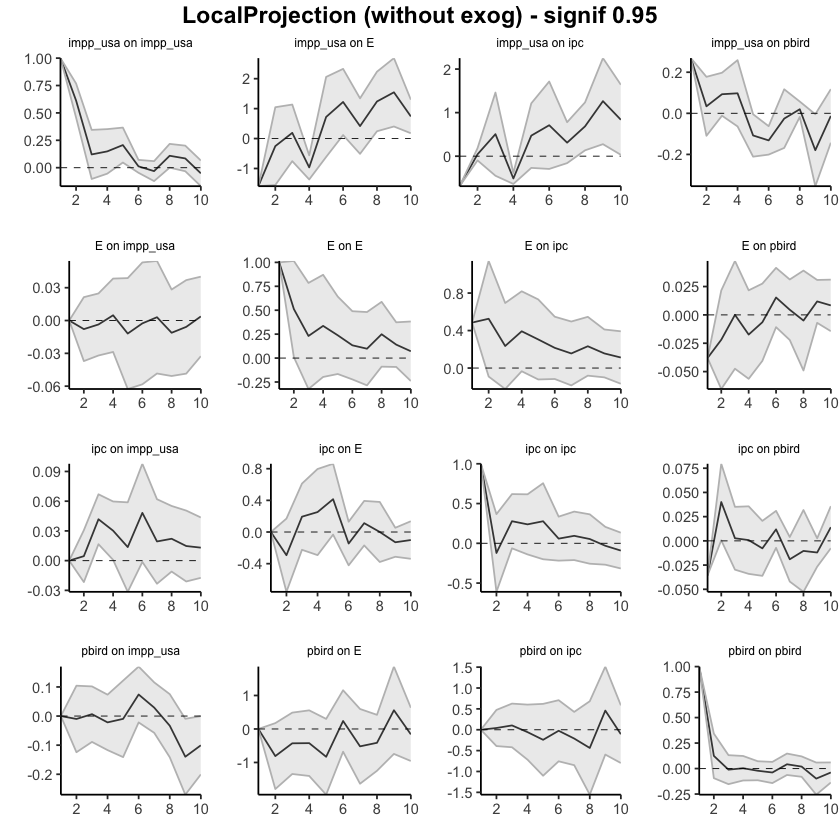

In [10]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), max_lags = 2, horizons=10, signif = 0.95)

[1] "LocalProjection (without exog) - Cumulative - signif 0.95"
    impulse response horizon  irf_value lower_bound upper_bound
1  impp_usa        E       1 -1.5911110   -1.591111  -1.5911110
2  impp_usa        E       2 -1.8439639   -3.143530  -0.5443982
3  impp_usa        E       3 -1.6538381   -3.898964   0.5912872
4  impp_usa        E       4 -2.6181357   -5.265689   0.0294175
5  impp_usa        E       5 -1.8959076   -5.879979   2.0881639
6  impp_usa        E       6 -0.6738332   -5.763412   4.4157455
7  impp_usa        E       7 -0.2574989   -6.274077   5.7590789
8  impp_usa        E       8  0.9810517   -6.030417   7.9925201
9  impp_usa        E       9  2.5258068   -5.627773  10.6793860
10 impp_usa        E      10  3.2638342   -5.450754  11.9784225
11 impp_usa        E      11  4.4412616   -5.171453  14.0539765
   impulse response horizon   irf_value lower_bound upper_bound
78     ipc        E       1  0.00000000   0.0000000   0.0000000
79     ipc        E       2 -0.29320023 

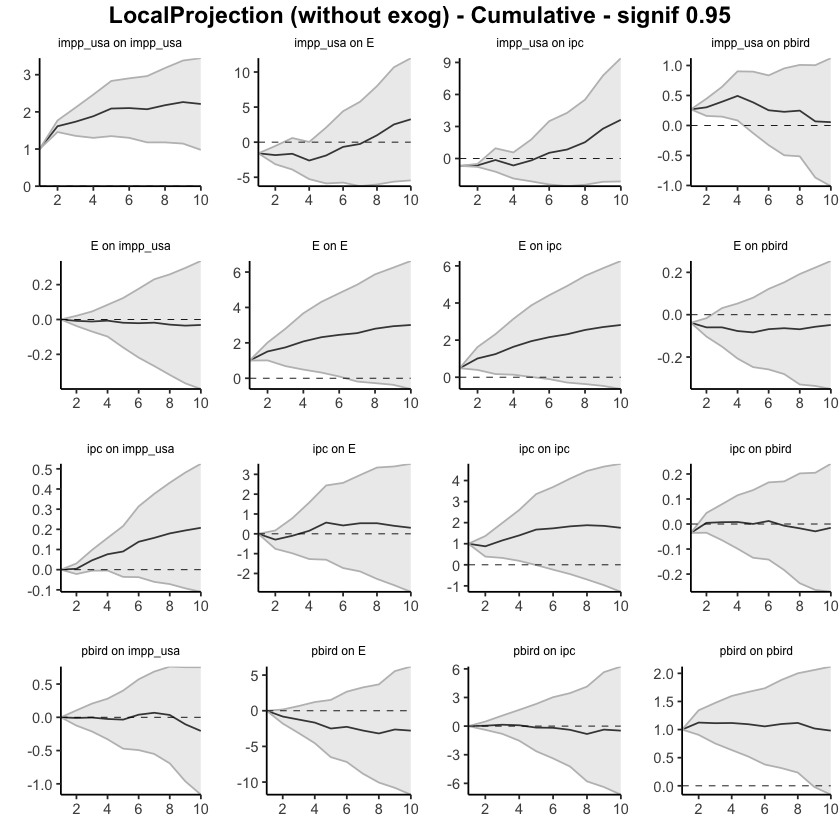

In [11]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), max_lags = 2, horizons=10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (without exog) - signif 0.95"
    impulse response horizon  irf_value lower_bound upper_bound
1  impp_usa        E       1 -1.5446308  -1.5446308  -1.5446308
2  impp_usa        E       2 -0.4235005  -1.6739994   0.8269984
3  impp_usa        E       3  0.3351997  -0.7774561   1.4478554
4  impp_usa        E       4 -0.6853284  -1.3169637  -0.0536931
5  impp_usa        E       5  0.7874616  -0.4796184   2.0545416
6  impp_usa        E       6  1.3697783   0.2540676   2.4854889
7  impp_usa        E       7  0.6131873  -0.3932390   1.6196136
8  impp_usa        E       8  1.3673612   0.2385035   2.4962189
9  impp_usa        E       9  1.6757367   0.5200625   2.8314110
10 impp_usa        E      10  0.7925810   0.1288639   1.4562981
11 impp_usa        E      11  1.1532893   0.2139356   2.0926429
   impulse response horizon   irf_value lower_bound upper_bound
78     ipc        E       1  0.00000000  0.00000000  0.00000000
79     ipc        E       2 -0.36580988 -0.81207174  

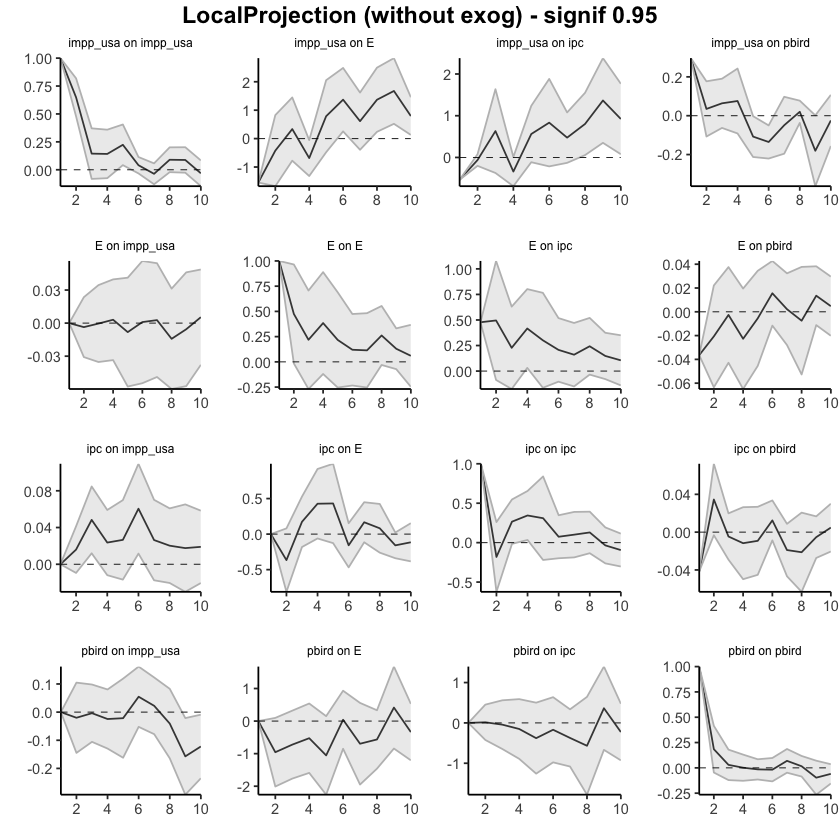

In [8]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), max_lags = 3, horizons=10, signif = 0.95)

[1] "LocalProjection (without exog) - Cumulative - signif 0.95"
    impulse response horizon  irf_value lower_bound upper_bound
1  impp_usa        E       1 -1.5446308   -1.544631  -1.5446308
2  impp_usa        E       2 -1.9681313   -3.218630  -0.7176324
3  impp_usa        E       3 -1.6329316   -3.996086   0.7302230
4  impp_usa        E       4 -2.3182600   -5.313050   0.6765299
5  impp_usa        E       5 -1.5307984   -5.792668   2.7310715
6  impp_usa        E       6 -0.1610201   -5.538601   5.2165604
7  impp_usa        E       7  0.4521672   -5.931840   6.8361740
8  impp_usa        E       8  1.8195284   -5.693336   9.3323929
9  impp_usa        E       9  3.4952651   -5.173274  12.1638039
10 impp_usa        E      10  4.2878461   -5.044410  13.6201019
11 impp_usa        E      11  5.4411353   -4.830474  15.7127448
   impulse response horizon  irf_value lower_bound upper_bound
78     ipc        E       1  0.0000000   0.0000000  0.00000000
79     ipc        E       2 -0.3658099  -0

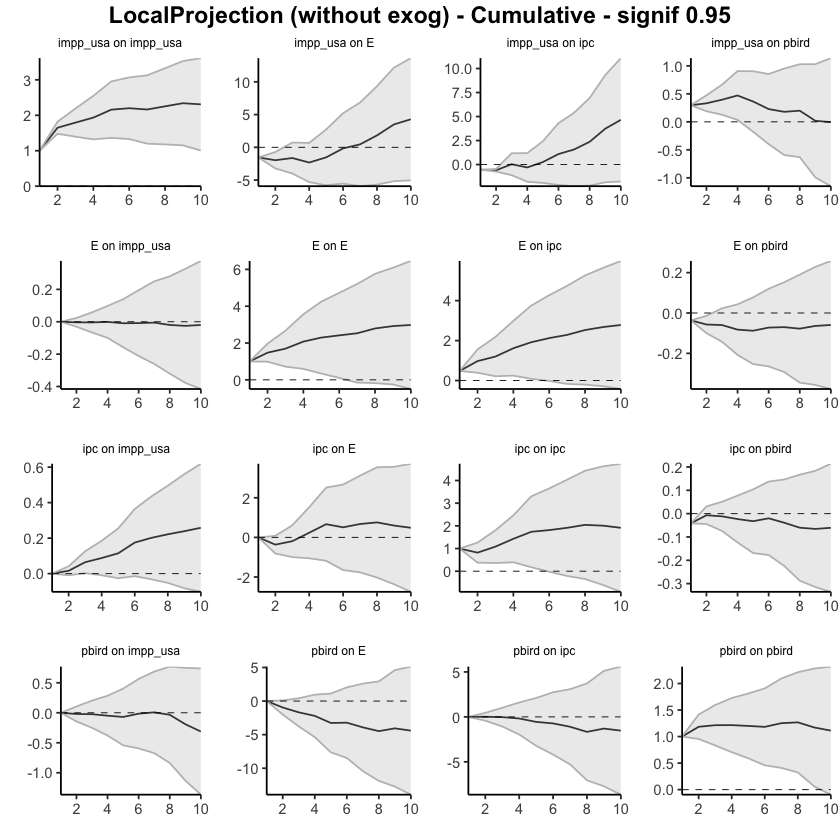

In [9]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), max_lags = 3, horizons=10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon     irf_value lower_bound upper_bound
23     ipc        E       1  0.000000e+00  0.00000000  0.00000000
24     ipc        E       2 -2.944704e-01 -0.71692649  0.12798560
25     ipc        E       3  1.930313e-01 -0.17690995  0.56297247
26     ipc        E       4  2.513391e-01 -0.19525467  0.69793291
27     ipc        E       5  4.133609e-01  0.02866735  0.79805454
28     ipc        E       6 -1.450994e-01 -0.40086101  0.11066229
29     ipc        E       7  1.109747e-01 -0.12561820  0.34756767
30     ipc        E       8 -6.852337e-05 -0.36817127  0.36803422
31     ipc        E       9 -1.286817e-01 -0.29544429  0.03808098
32     ipc        E      10 -1.013762e-01 -0.33882469  0.13607221
33     ipc        E      11 -1.646819e-02 -0.36086192  0.32792554
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000   0.0000000   0.0000000
46   pbird        E       2 -0.809

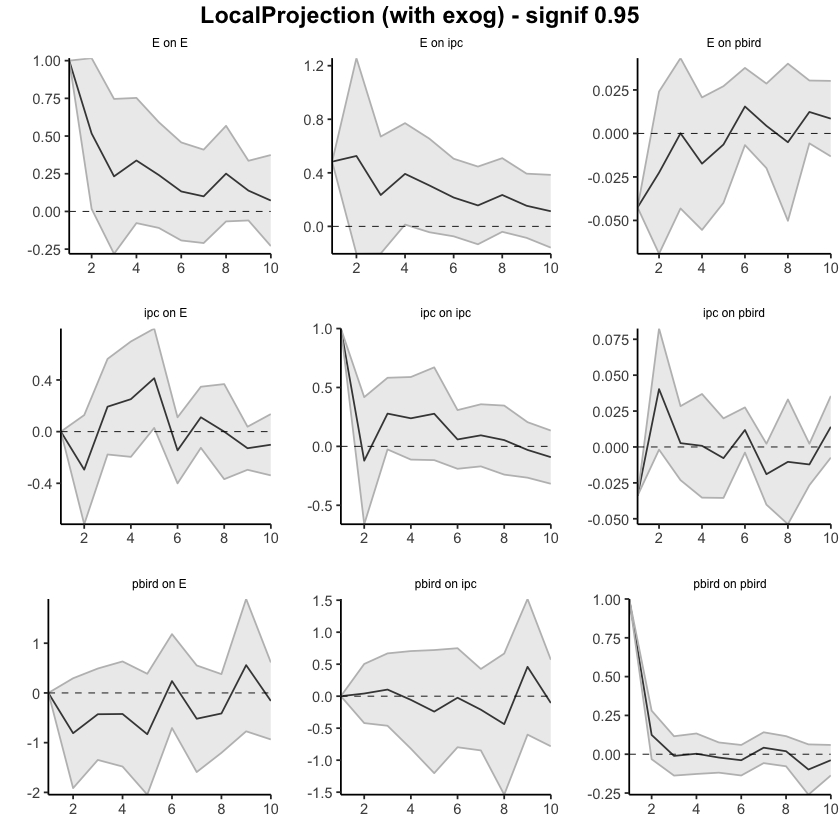

In [12]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 2, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon  irf_value lower_bound upper_bound
23     ipc        E       1  0.0000000   0.0000000   0.0000000
24     ipc        E       2 -0.2944704  -0.7169265   0.1279856
25     ipc        E       3 -0.1014392  -0.8938364   0.6909581
26     ipc        E       4  0.1498999  -1.0890911   1.3888910
27     ipc        E       5  0.5632609  -1.0604238   2.1869455
28     ipc        E       6  0.4181615  -1.4612848   2.2976078
29     ipc        E       7  0.5291363  -1.5869030   2.6451755
30     ipc        E       8  0.5290677  -1.9550742   3.0132097
31     ipc        E       9  0.4003861  -2.2505185   3.0512907
32     ipc        E      10  0.2990098  -2.5893432   3.1873629
33     ipc        E      11  0.2825416  -2.9502051   3.5152884
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.8095191   -1.914003   0.29

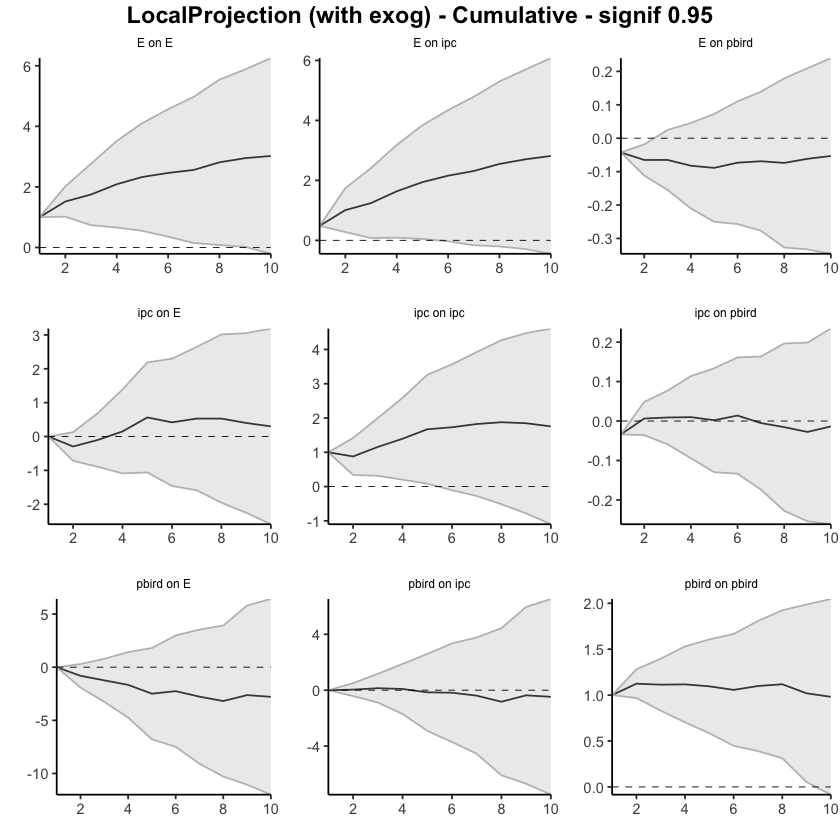

In [13]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value  lower_bound upper_bound
23     ipc        E       1  0.00000000  0.000000000  0.00000000
24     ipc        E       2 -0.34671181 -0.708641177  0.01521755
25     ipc        E       3  0.27792655  0.002658104  0.55319500
26     ipc        E       4  0.43894962  0.107282044  0.77061720
27     ipc        E       5  0.37041306 -0.083207407  0.82403353
28     ipc        E       6 -0.17634858 -0.477013508  0.12431634
29     ipc        E       7  0.16487035 -0.130029385  0.45977009
30     ipc        E       8  0.05116697 -0.227220702  0.32955464
31     ipc        E       9 -0.19991464 -0.414702427  0.01487316
32     ipc        E      10 -0.12615000 -0.457629360  0.20532936
33     ipc        E      11 -0.05668582 -0.490761487  0.37738984
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000   0.0000000   0.0000000
46   pbird        E       2 -0.5833729  -1.678

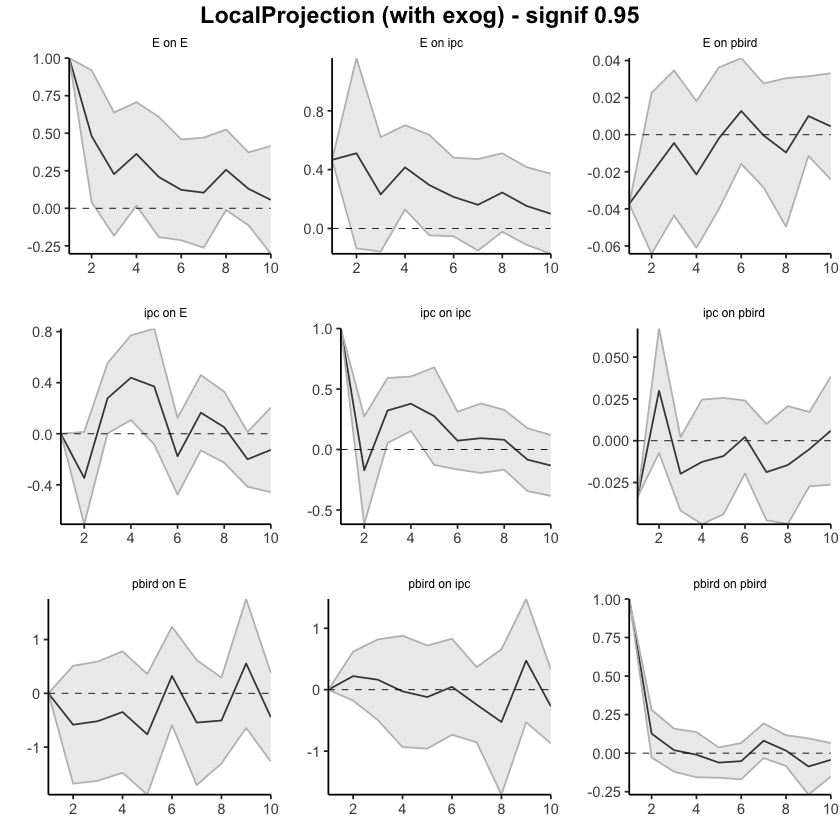

In [14]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 5, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000  0.00000000
24     ipc        E       2 -0.34671181  -0.7086412  0.01521755
25     ipc        E       3 -0.06878526  -0.7059831  0.56841255
26     ipc        E       4  0.37016436  -0.5987010  1.33902976
27     ipc        E       5  0.74057742  -0.6819084  2.16306329
28     ipc        E       6  0.56422884  -1.1589219  2.28737962
29     ipc        E       7  0.72909919  -1.2889513  2.74714971
30     ipc        E       8  0.78026616  -1.5161720  3.07670435
31     ipc        E       9  0.58035153  -1.9308745  3.09157751
32     ipc        E      10  0.45420152  -2.3885038  3.29690687
33     ipc        E      11  0.39751570  -2.8792653  3.67429671
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000    0.000000
46   pbird        E       2 -0.5833729   -1.6

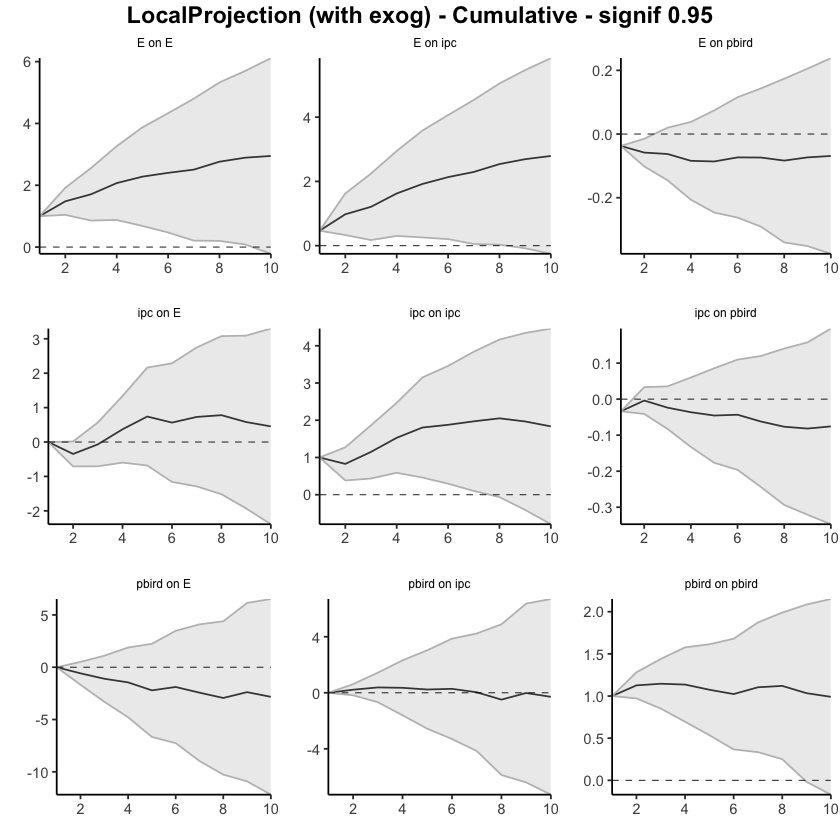

In [15]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 5, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon  irf_value lower_bound upper_bound
23     ipc        E       1  0.0000000   0.0000000   0.0000000
24     ipc        E       2 -0.3700932  -0.7633971   0.0232106
25     ipc        E       3 -0.1999875  -0.8864426   0.4864676
26     ipc        E       4  0.2252687  -0.7931987   1.2437362
27     ipc        E       5  0.6518983  -0.8337275   2.1375242
28     ipc        E       6  0.4945774  -1.2674685   2.2566234
29     ipc        E       7  0.6583170  -1.3483892   2.6650231
30     ipc        E       8  0.7375396  -1.5777631   3.0528423
31     ipc        E       9  0.5810761  -1.8950863   3.0572385
32     ipc        E      10  0.4646601  -2.2882671   3.2175873
33     ipc        E      11  0.3840133  -2.7091443   3.4771709
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.9558042   -2.103228   0.19

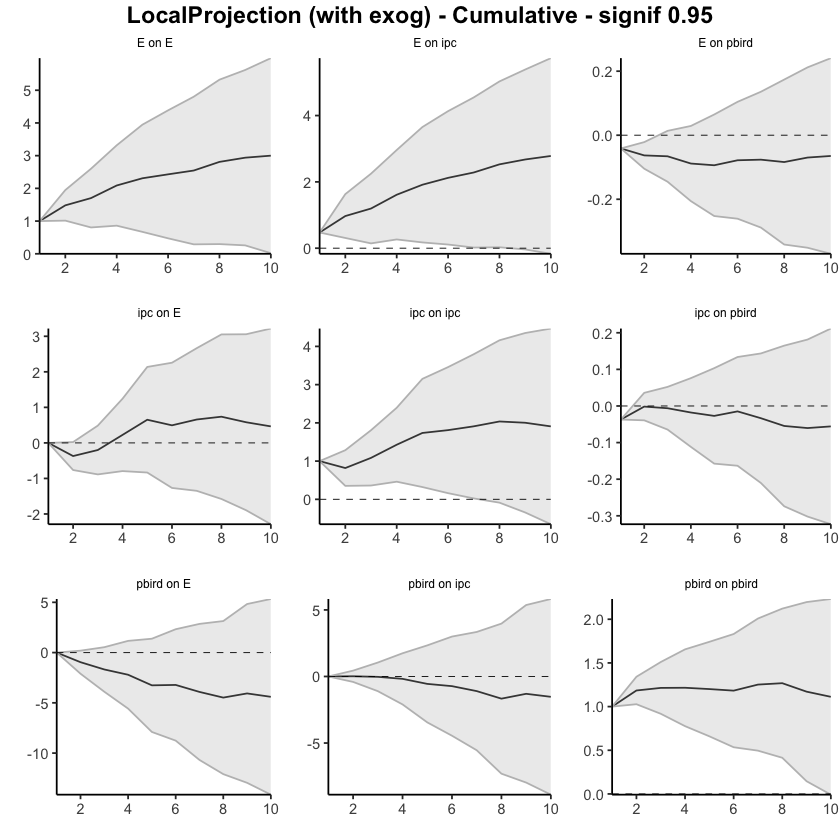

In [16]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 3, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000  0.00000000   0.0000000
24     ipc        E       2 -0.25188704 -0.62926517   0.1254911
25     ipc        E       3  0.23119468 -0.14273680   0.6051262
26     ipc        E       4  0.27985332 -0.18669638   0.7464030
27     ipc        E       5  0.44744780  0.10908410   0.7858115
28     ipc        E       6 -0.07579692 -0.32493658   0.1733427
29     ipc        E       7  0.18211830 -0.05778146   0.4220181
30     ipc        E       8  0.05715532 -0.35068834   0.4649990
31     ipc        E       9 -0.08133219 -0.28011934   0.1174550
32     ipc        E      10 -0.04477179 -0.30979927   0.2202557
33     ipc        E      11  0.06926349 -0.29176721   0.4302942
   impulse response horizon    irf_value lower_bound upper_bound
45   pbird        E       1  0.000000000   0.0000000   0.0000000
46   pbird        E       2 -0.639418034  -1.7256291  

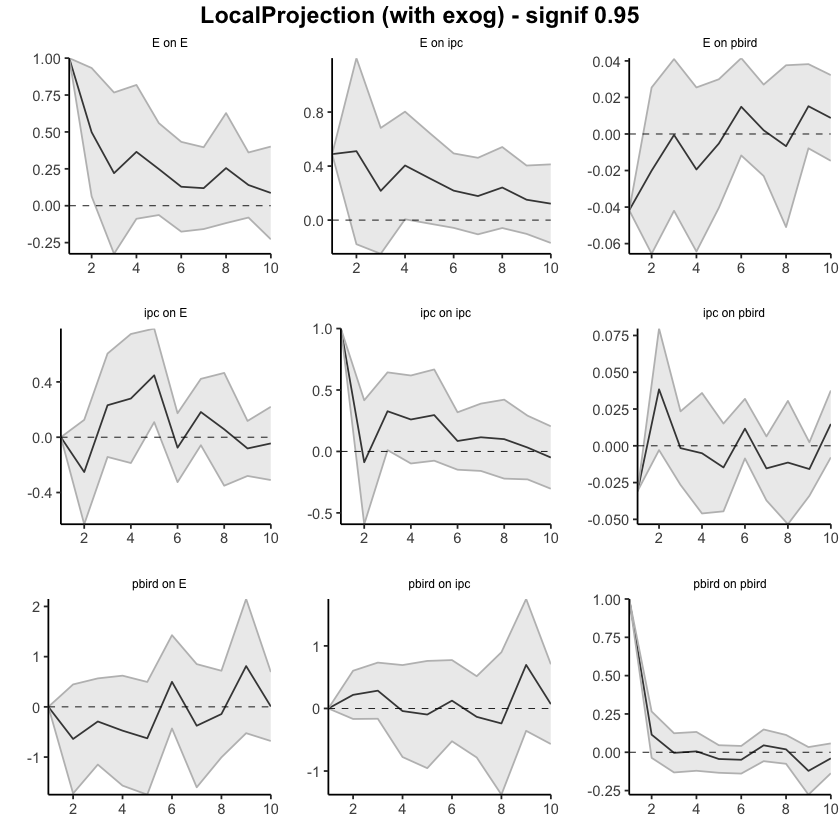

In [17]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA"), max_lags = 2, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000   0.0000000
24     ipc        E       2 -0.25188704  -0.6292652   0.1254911
25     ipc        E       3 -0.02069236  -0.7720020   0.7306172
26     ipc        E       4  0.25916096  -0.9586983   1.4770203
27     ipc        E       5  0.70660876  -0.8496142   2.2628318
28     ipc        E       6  0.63081184  -1.1745508   2.4361745
29     ipc        E       7  0.81293014  -1.2323323   2.8581926
30     ipc        E       8  0.87008546  -1.5830206   3.3231915
31     ipc        E       9  0.78875328  -1.8631400   3.4406465
32     ipc        E      10  0.74398149  -2.1729392   3.6609022
33     ipc        E      11  0.81324497  -2.4647064   4.0911964
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000    0.000000
46   pbird        E       2 -0.6394180   -1.7

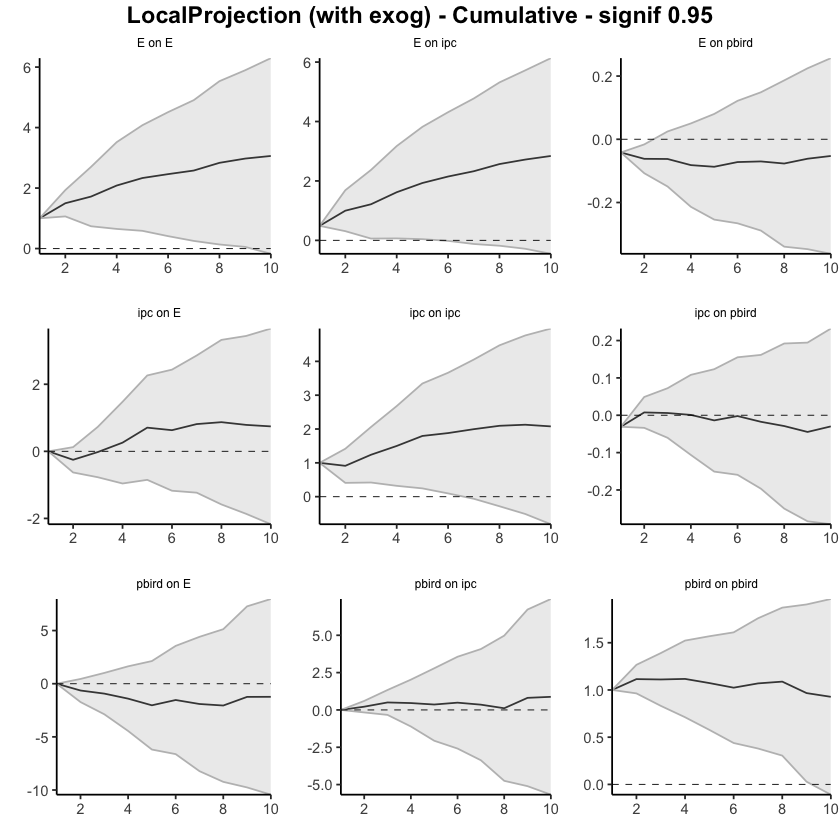

In [18]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000  0.00000000  0.00000000
24     ipc        E       2 -0.34965938 -0.67070519 -0.02861357
25     ipc        E       3  0.32768723  0.05634605  0.59902840
26     ipc        E       4  0.45371073  0.11874510  0.78867635
27     ipc        E       5  0.34738687 -0.04332732  0.73810107
28     ipc        E       6 -0.13401747 -0.46397452  0.19593958
29     ipc        E       7  0.24225763 -0.05339169  0.53790696
30     ipc        E       8  0.10939988 -0.24445539  0.46325514
31     ipc        E       9 -0.16594966 -0.43293833  0.10103901
32     ipc        E      10 -0.06364590 -0.36706296  0.23977117
33     ipc        E      11  0.06739048 -0.35704062  0.49182157
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000   0.0000000   0.0000000
46   pbird        E       2 -0.6369356  -1.8522383   0.578

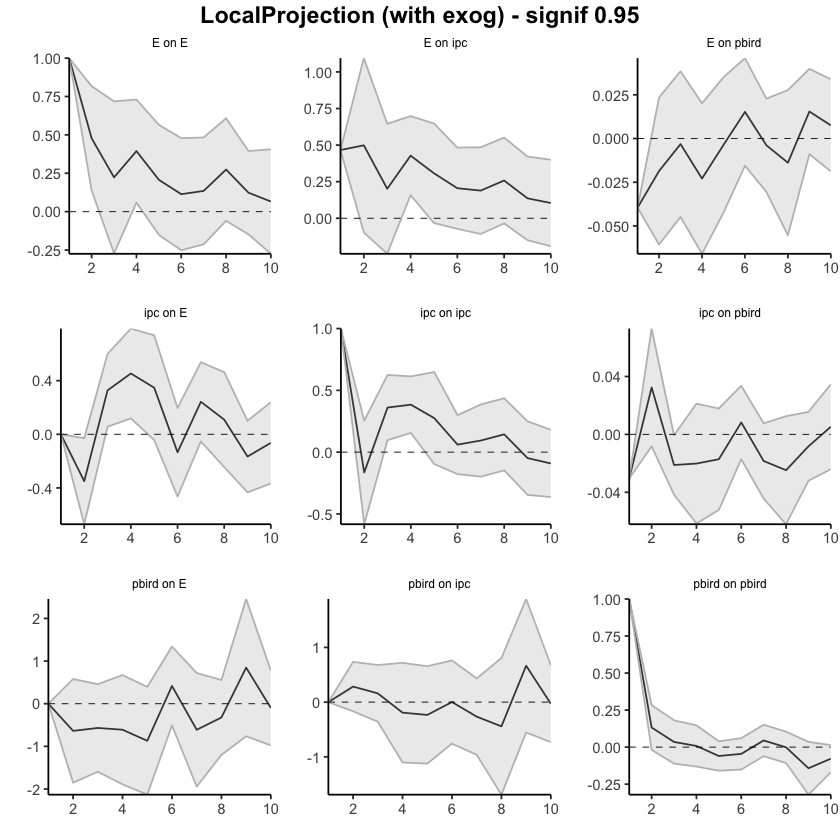

In [19]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA"), max_lags = 5, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000  0.00000000
24     ipc        E       2 -0.34965938  -0.6707052 -0.02861357
25     ipc        E       3 -0.02197216  -0.6143591  0.57041483
26     ipc        E       4  0.43173857  -0.4956140  1.35909118
27     ipc        E       5  0.77912544  -0.5389414  2.09719225
28     ipc        E       6  0.64510797  -1.0029159  2.29313183
29     ipc        E       7  0.88736560  -1.0563076  2.83103878
30     ipc        E       8  0.99676548  -1.3007630  3.29429393
31     ipc        E       9  0.83081582  -1.7337013  3.39533294
32     ipc        E      10  0.76716992  -2.1007643  3.63510410
33     ipc        E      11  0.83456040  -2.4578049  4.12692567
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.6369356   -1.8

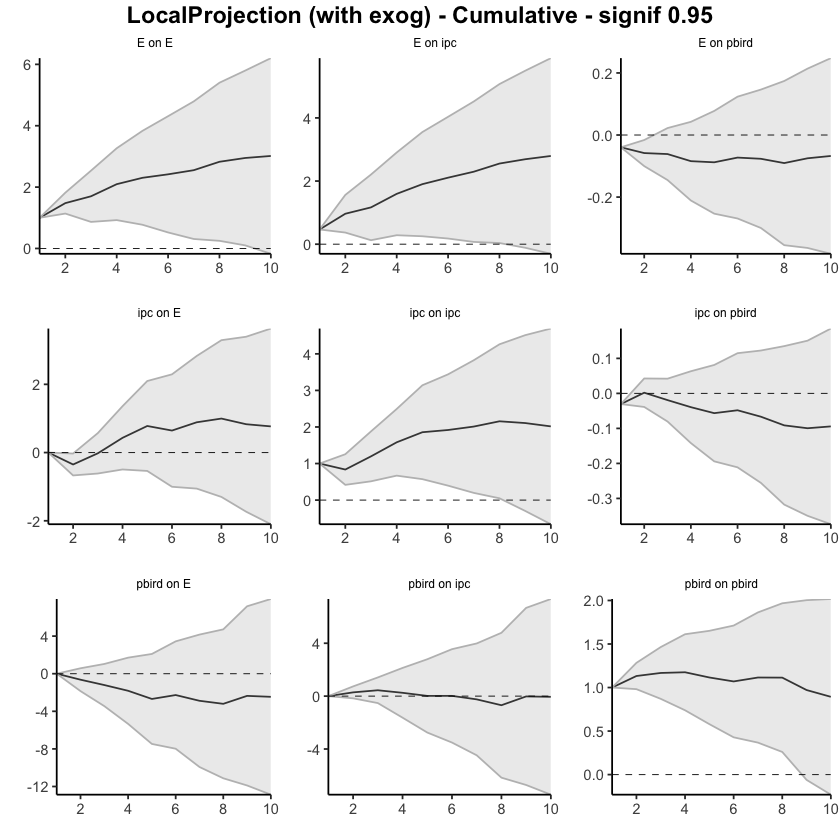

In [20]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA"), max_lags = 5, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000  0.00000000   0.0000000
24     ipc        E       2 -0.25721554 -0.63082901   0.1163979
25     ipc        E       3  0.21659495 -0.13568918   0.5688791
26     ipc        E       4  0.27253282 -0.18052468   0.7255903
27     ipc        E       5  0.45841965  0.10482740   0.8120119
28     ipc        E       6 -0.09401669 -0.33600641   0.1479730
29     ipc        E       7  0.17252916 -0.06772146   0.4127798
30     ipc        E       8  0.07834181 -0.32216240   0.4788460
31     ipc        E       9 -0.06635076 -0.27022983   0.1375283
32     ipc        E      10 -0.02031993 -0.28837759   0.2477377
33     ipc        E      11  0.10881260 -0.26798145   0.4856067
   impulse response horizon   irf_value lower_bound upper_bound
45   pbird        E       1  0.00000000   0.0000000   0.0000000
46   pbird        E       2 -0.65720137  -1.7498181   0.

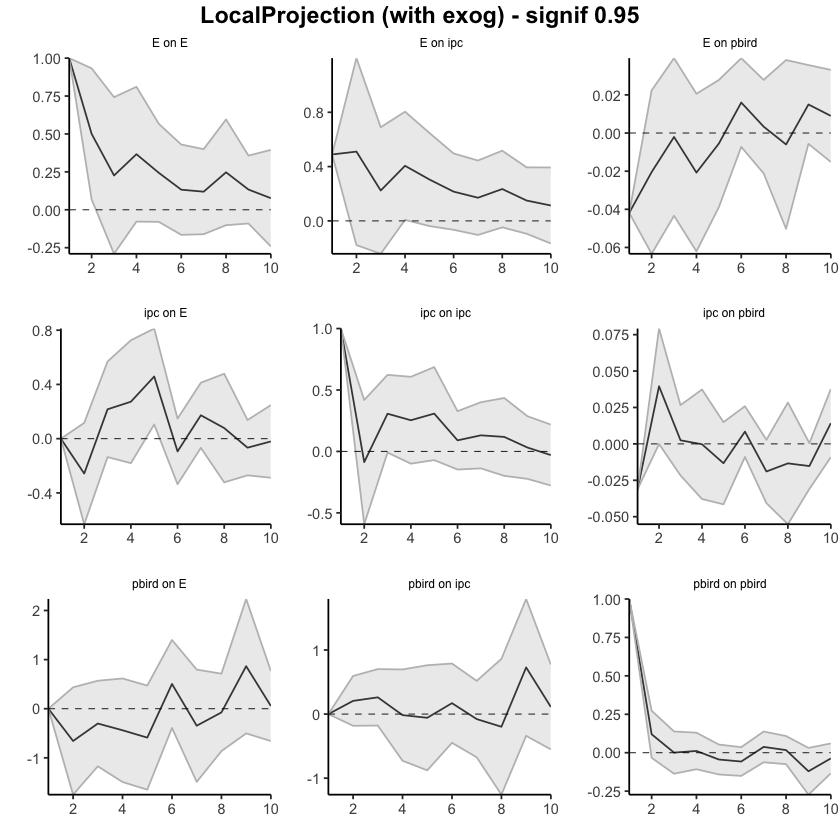

In [21]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA"), max_lags = 2, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000   0.0000000
24     ipc        E       2 -0.25721554  -0.6308290   0.1163979
25     ipc        E       3 -0.04062059  -0.7665182   0.6852770
26     ipc        E       4  0.23191223  -0.9470429   1.4108673
27     ipc        E       5  0.69033188  -0.8422155   2.2228792
28     ipc        E       6  0.59631520  -1.1782219   2.3708523
29     ipc        E       7  0.76884436  -1.2459433   2.7836321
30     ipc        E       8  0.84718617  -1.5681057   3.2624781
31     ipc        E       9  0.78083541  -1.8383356   3.4000064
32     ipc        E      10  0.76051548  -2.1267132   3.6477441
33     ipc        E      11  0.86932808  -2.3946946   4.1333508
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.6572014   -1.7

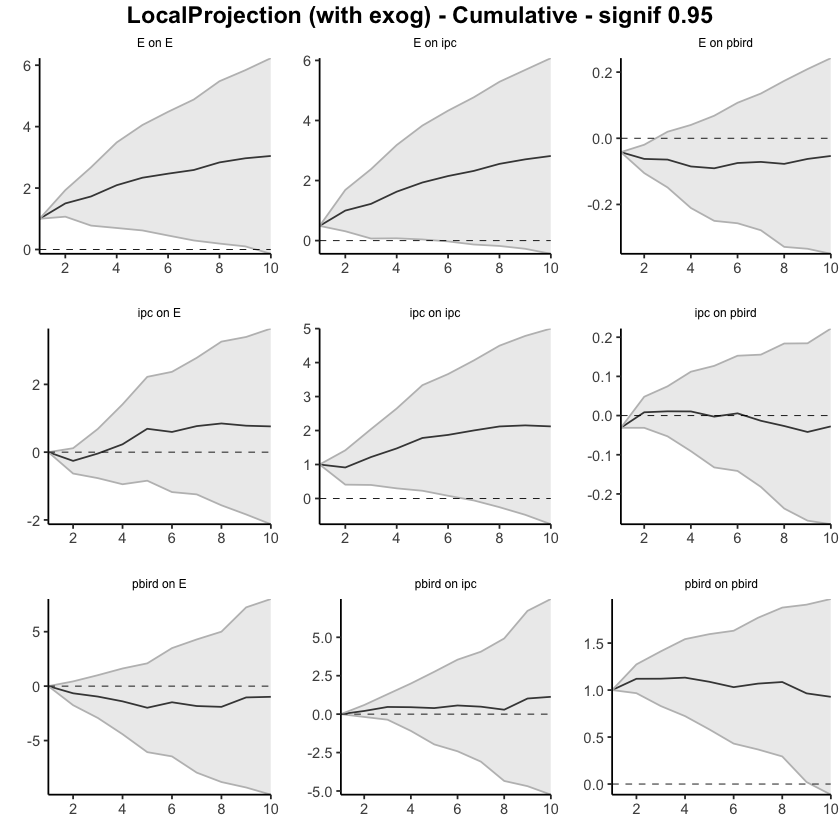

In [22]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000  0.00000000  0.00000000
24     ipc        E       2 -0.35810429 -0.69882156 -0.01738702
25     ipc        E       3  0.26956153 -0.01576035  0.55488340
26     ipc        E       4  0.45125210  0.12888872  0.77361548
27     ipc        E       5  0.36160671 -0.06829816  0.79151159
28     ipc        E       6 -0.16164051 -0.43866464  0.11538363
29     ipc        E       7  0.24418871 -0.04179061  0.53016804
30     ipc        E       8  0.16504684 -0.20951768  0.53961135
31     ipc        E       9 -0.12805089 -0.39080208  0.13470029
32     ipc        E      10 -0.03280836 -0.31302985  0.24741313
33     ipc        E      11  0.12686848 -0.30568720  0.55942415
   impulse response horizon   irf_value lower_bound upper_bound
45   pbird        E       1  0.00000000   0.0000000   0.0000000
46   pbird        E       2 -0.54760499  -1.7460297   0.

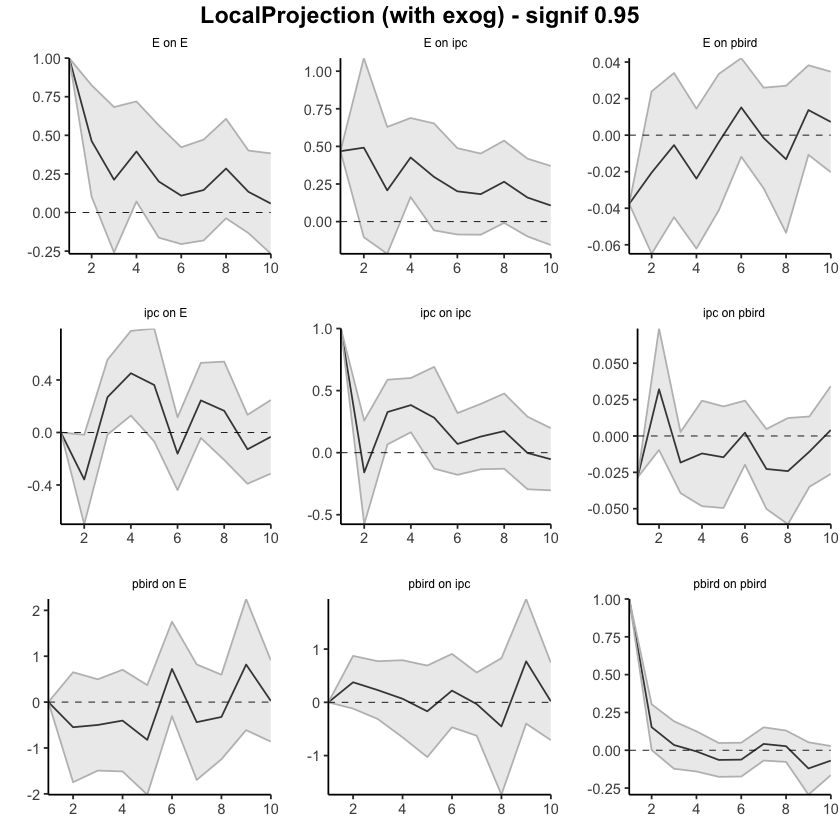

In [23]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA"), max_lags = 5, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000  0.00000000
24     ipc        E       2 -0.35810429  -0.6988216 -0.01738702
25     ipc        E       3 -0.08854277  -0.7145819  0.53749638
26     ipc        E       4  0.36270933  -0.5856932  1.31111186
27     ipc        E       5  0.72431604  -0.6539914  2.10262345
28     ipc        E       6  0.56267554  -1.0926560  2.21800707
29     ipc        E       7  0.80686425  -1.1344466  2.74817511
30     ipc        E       8  0.97191109  -1.3439643  3.28778646
31     ipc        E       9  0.84386019  -1.7347664  3.42248675
32     ipc        E      10  0.81105183  -2.0477962  3.66989988
33     ipc        E      11  0.93792031  -2.3534834  4.22932403
   impulse response horizon irf_value lower_bound upper_bound
45   pbird        E       1  0.000000    0.000000   0.0000000
46   pbird        E       2 -0.547605   -1.7460

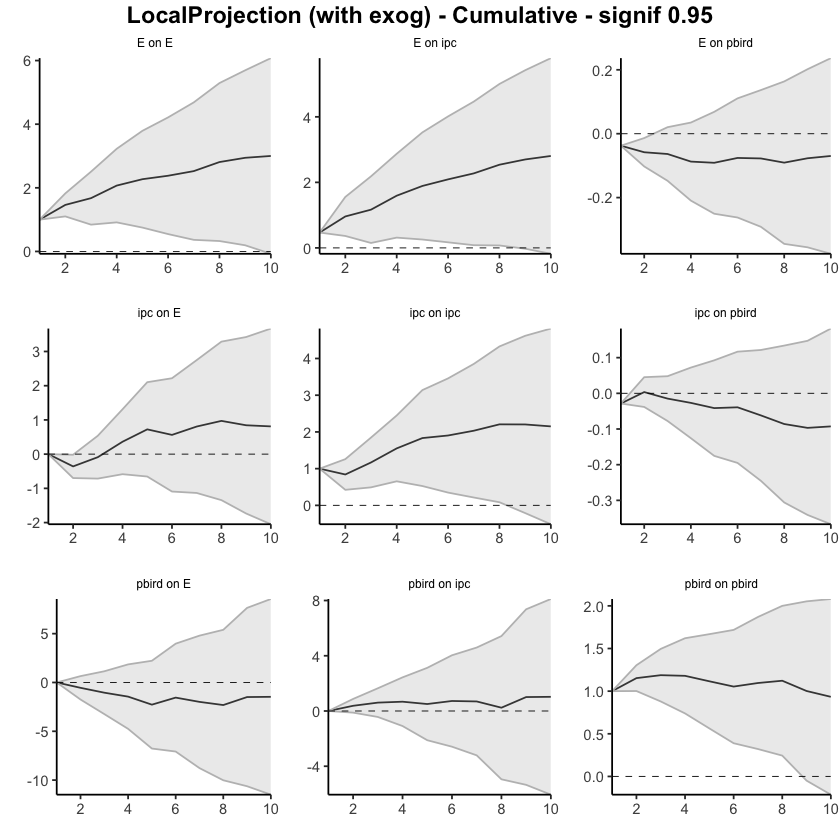

In [24]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA"), max_lags = 5, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000  0.00000000   0.0000000
24     ipc        E       2 -0.26329346 -0.64965025   0.1230633
25     ipc        E       3  0.21550401 -0.10797229   0.5389803
26     ipc        E       4  0.28634380 -0.15932069   0.7320083
27     ipc        E       5  0.48153051  0.13087070   0.8321903
28     ipc        E       6 -0.09775673 -0.33463100   0.1391175
29     ipc        E       7  0.17247276 -0.04582455   0.3907701
30     ipc        E       8  0.09057577 -0.28661506   0.4677666
31     ipc        E       9 -0.06414095 -0.24756129   0.1192794
32     ipc        E      10 -0.03948635 -0.30167157   0.2226989
33     ipc        E      11  0.08118122 -0.28467020   0.4470326
   impulse response horizon   irf_value lower_bound upper_bound
45   pbird        E       1  0.00000000   0.0000000   0.0000000
46   pbird        E       2 -0.66403922  -1.7430491   0.

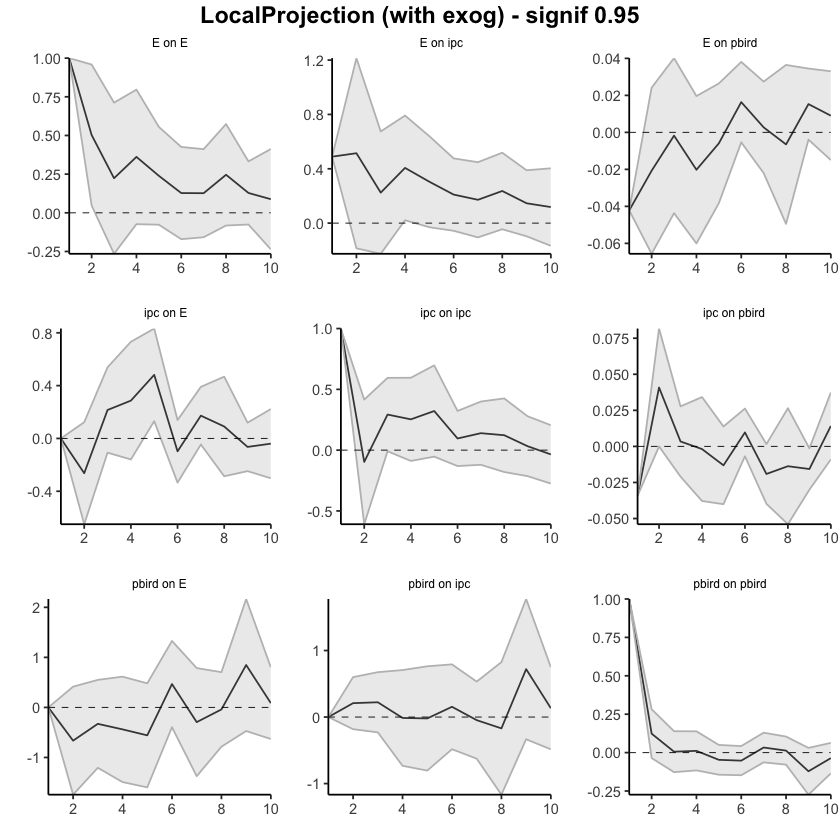

In [25]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA"), max_lags = 2, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000   0.0000000
24     ipc        E       2 -0.26329346  -0.6496502   0.1230633
25     ipc        E       3 -0.04778944  -0.7576225   0.6620437
26     ipc        E       4  0.23855436  -0.9169432   1.3940520
27     ipc        E       5  0.72008487  -0.7860725   2.2262423
28     ipc        E       6  0.62232814  -1.1207035   2.3653598
29     ipc        E       7  0.79480090  -1.1665281   2.7561299
30     ipc        E       8  0.88537667  -1.4531431   3.2238965
31     ipc        E       9  0.82123571  -1.7007044   3.3431759
32     ipc        E      10  0.78174936  -2.0023760   3.5658747
33     ipc        E      11  0.86293058  -2.2870462   4.0129074
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.6640392   -1.7

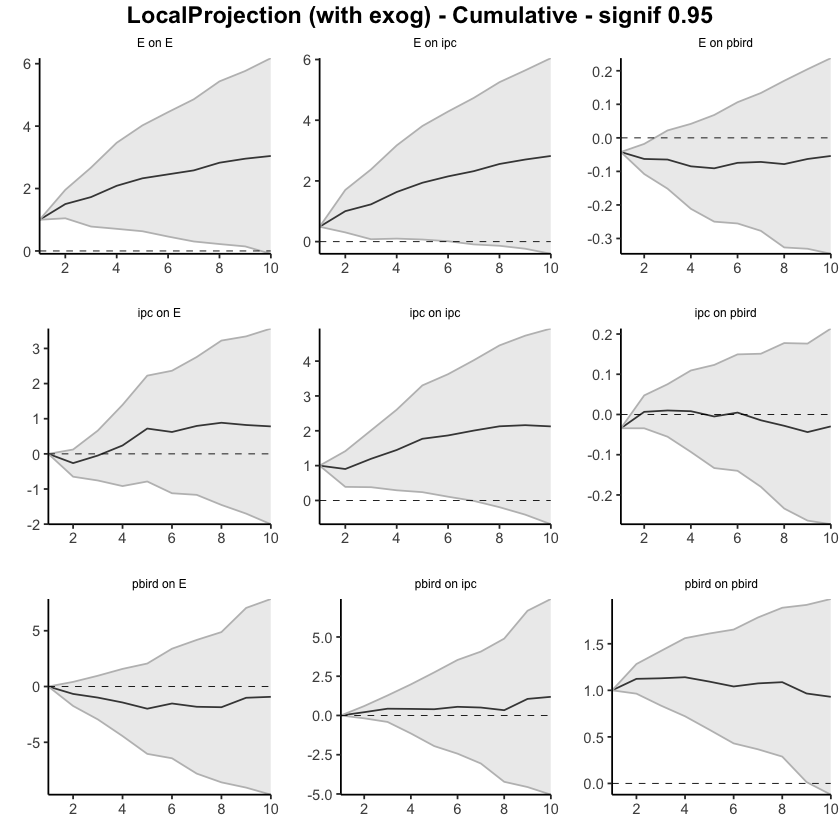

In [26]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value  lower_bound upper_bound
23     ipc        E       1  0.00000000  0.000000000 0.000000000
24     ipc        E       2 -0.36180461 -0.730442127 0.006832911
25     ipc        E       3  0.25980676 -0.008990424 0.528603951
26     ipc        E       4  0.39486660  0.058810699 0.730922504
27     ipc        E       5  0.39034406 -0.069444646 0.850132760
28     ipc        E       6 -0.18580021 -0.502167320 0.130566900
29     ipc        E       7  0.13278635 -0.166455017 0.432027715
30     ipc        E       8  0.09770195 -0.260983935 0.456387842
31     ipc        E       9 -0.12747949 -0.412967104 0.158008118
32     ipc        E      10 -0.06699645 -0.379192348 0.245199447
33     ipc        E      11  0.01687750 -0.424295705 0.458050715
   impulse response horizon   irf_value lower_bound upper_bound
45   pbird        E       1  0.00000000   0.0000000   0.0000000
46   pbird        E       2 -0.63679798  -1.

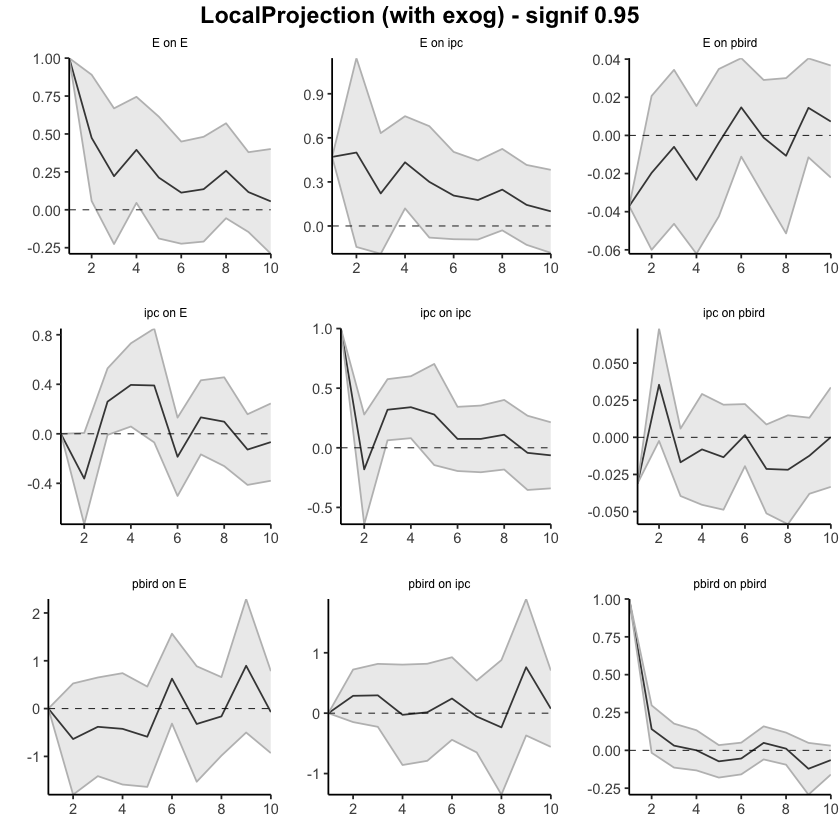

In [27]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA"), max_lags = 5, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon  irf_value lower_bound upper_bound
23     ipc        E       1  0.0000000   0.0000000 0.000000000
24     ipc        E       2 -0.3618046  -0.7304421 0.006832911
25     ipc        E       3 -0.1019978  -0.7394326 0.535436862
26     ipc        E       4  0.2928688  -0.6806219 1.266359367
27     ipc        E       5  0.6832128  -0.7500665 2.116492127
28     ipc        E       6  0.4974126  -1.2522338 2.247059027
29     ipc        E       7  0.6301990  -1.4186888 2.679086742
30     ipc        E       8  0.7279009  -1.6796728 3.135474584
31     ipc        E       9  0.6004214  -2.0926399 3.293482702
32     ipc        E      10  0.5334250  -2.4718322 3.538682149
33     ipc        E      11  0.5503025  -2.8961279 3.996732863
   impulse response horizon irf_value lower_bound upper_bound
45   pbird        E       1  0.000000    0.000000   0.0000000
46   pbird        E       2 -0.636798   -1.799682   0.52608

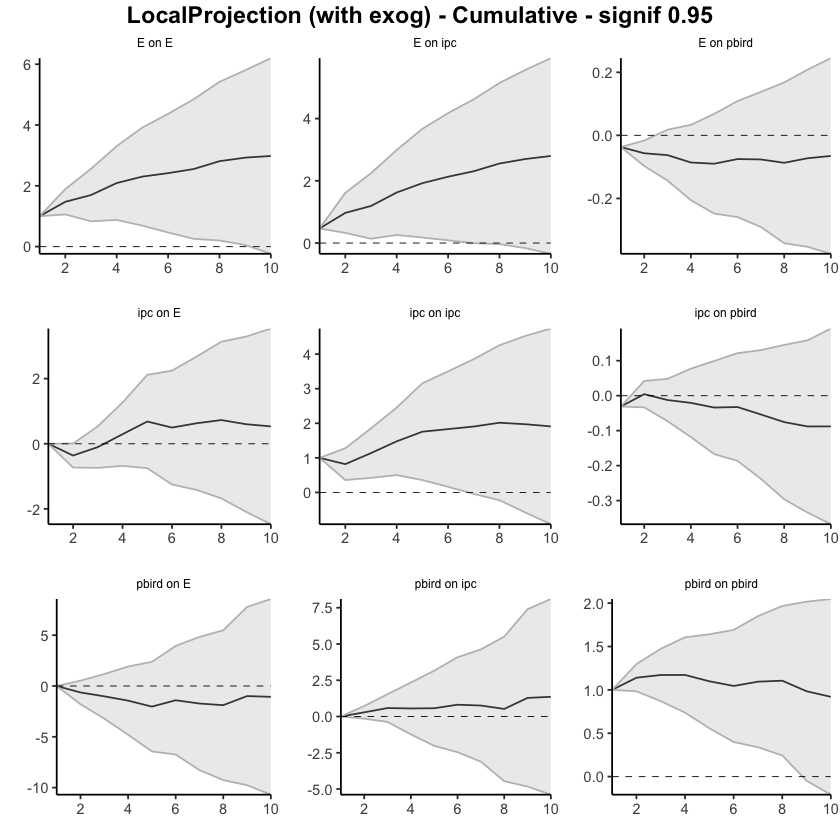

In [28]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA"), max_lags = 5, newey_lags = 10, signif = 0.95, cumulative=TRUE)